In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [3]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df1.shape

(13320, 9)

In [5]:
df1.groupby("area_type")["area_type"].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
df2  = df1.drop(["availability", "society", "area_type", "balcony"], axis = 1)
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [7]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
df3 = df2.dropna()

In [9]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [10]:
df3["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
df3["bhk"]  = df3["size"].apply(lambda x : int(x.split(" ")[0]))
df3.head()

C:\Users\PC\AppData\Local\Temp\ipykernel_13600\1499531960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["bhk"]  = df3["size"].apply(lambda x : int(x.split(" ")[0]))


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [12]:
df3.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [13]:
df3[df3.bhk > 20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [14]:
df3.loc[4684]

location      Munnekollal
size           43 Bedroom
total_sqft           2400
bath                 40.0
price               660.0
bhk                    43
Name: 4684, dtype: object

In [15]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      shape=(2067,), dtype=object)

In [16]:
def is_float(x) : 
    try : 
        float(x)
    except : 
        return False  
    return True

In [17]:
df3[~df3["total_sqft"].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [18]:
def convert_range_to_float(x): 
    numbers = x.split("-")
    if len(numbers)==2 :
        return (float(numbers[0]) +float(numbers[1]))/2
    try : 
       return float(x) 
    except : 
       return None

In [19]:
convert_range_to_float("34")

34.0

In [20]:
df3["total_sqft"] = df3["total_sqft"].apply(convert_range_to_float)
df4 = df3
df4.head()

C:\Users\PC\AppData\Local\Temp\ipykernel_13600\951880105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["total_sqft"] = df3["total_sqft"].apply(convert_range_to_float)


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [21]:
df5 = df4.copy()
df5["price_per_sqft"]  = round(df5["price"]*100000 / df5["total_sqft"], 2)
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.81
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.38
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.56
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.89
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.00


In [22]:
len(df5.location.unique())

1304

In [23]:
df5.location  = df5.location.apply(lambda x : x.strip())

In [24]:
location_stats = df5.groupby("location")["location"].agg("count").sort_values(ascending = False)
location_stats 

location
Whitefield                            535
Sarjapur  Road                        392
Electronic City                       304
Kanakpura Road                        266
Thanisandra                           236
                                     ... 
poornaprajna layout                     1
pavitra paradise                        1
near Ramanashree California resort      1
mvj engineering college                 1
1Kasavanhalli                           1
Name: location, Length: 1293, dtype: int64

In [25]:
len(location_stats[location_stats<10])

1039

In [26]:
location_stats_less_than_10 = location_stats[location_stats<=10] 
location_stats_less_than_10

location
Kalkere                               10
Sadashiva Nagar                       10
BTM 1st Stage                         10
Basapura                              10
Gunjur Palya                          10
                                      ..
poornaprajna layout                    1
pavitra paradise                       1
near Ramanashree California resort     1
mvj engineering college                1
1Kasavanhalli                          1
Name: location, Length: 1052, dtype: int64

In [27]:
len(df5.location.unique())

1293

In [28]:
df5.location = df5.location.apply(lambda x : "other" if x in location_stats_less_than_10 else x)
len(df5.location.unique())

242

In [29]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.81
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.38
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.56
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.89
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.00
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.86
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.06
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.82
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.24
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.51


In [30]:
df5[df5.total_sqft/df5.bhk <300]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.51
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.33
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.98
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.30
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.00
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7,15571.43
13279,other,6 Bedroom,1200.0,5.0,130.0,6,10833.33
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.91
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.93


In [31]:
df6 = df5[~(df5.total_sqft/df5.bhk <300)]
df6.head()


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.81
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.38
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.56
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.89
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.00


In [32]:
df6.shape

(12502, 7)

In [33]:
df6.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli',
       'Lingadheeranahalli', 'Kothanur', 'Whitefield', 'Old Airport Road',
       'Rajaji Nagar', 'Marathahalli', '7th Phase JP Nagar', 'Gottigere',
       'Sarjapur', 'Mysore Road', 'Bisuvanahalli',
       'Raja Rajeshwari Nagar', 'other', 'Kengeri', 'Binny Pete',
       'Thanisandra', 'Bellandur', 'Electronic City', 'Ramagondanahalli',
       'Yelahanka', 'Hebbal', 'Kasturi Nagar', 'Kanakpura Road',
       'Electronics City Phase 1', 'Kundalahalli', 'Chikkalasandra',
       'Murugeshpalya', 'Sarjapur  Road', 'Doddathoguru', 'KR Puram',
       'Bhoganhalli', 'Lakshminarayana Pura', 'Begur Road', 'Varthur',
       'Bommanahalli', 'Gunjur', 'Hegde Nagar', 'Haralur Road',
       'Hennur Road', 'Kothannur', 'Kalena Agrahara', 'ISRO Layout',
       'Garudachar Palya', 'EPIP Zone', 'Dasanapura', 'Kasavanhalli',
       'Sanjay nagar', 'Domlur', 'Sarjapura - Attibele Road',
       'Yeshwanthpur', 'Chandapura', 'Nagarbhavi',

In [34]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502836
std        4168.127366
min         267.830000
25%        4210.530000
50%        5294.120000
75%        6916.670000
max      176470.590000
Name: price_per_sqft, dtype: float64

In [35]:

def remove_pps_outliers (df) : 
    df_out  = pd.DataFrame()
    for key, subdf in df.groupby("location") :
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft <= (m+st))]
        df_out  =  pd.concat([df_out , reduced_df], ignore_index = True)
    return df_out

# # Function to remove outliers from price_per_sqft by location
# def remove_pps_outliers(df):
#     df_out = pd.DataFrame()  # DataFrame to store filtered data
    
#     # Group by location
#     for key, subdf in df.groupby("location"):
#         m = np.mean(subdf.price_per_sqft)  # Calculate mean for each location
#         st = np.std(subdf.price_per_sqft)  # Calculate standard deviation for each location
        
#         # Apply filtering for outliers based on the threshold
#         lower_limit = m - st
#         upper_limit = m + st
        
#         reduced_df = subdf[(subdf.price_per_sqft >= lower_limit) & (subdf.price_per_sqft <= upper_limit)]
        
#         # Concatenate reduced data back into the output DataFrame
#         df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    
#     return df_out

In [36]:
df7 = remove_pps_outliers (df6)
df7.shape

(10241, 7)

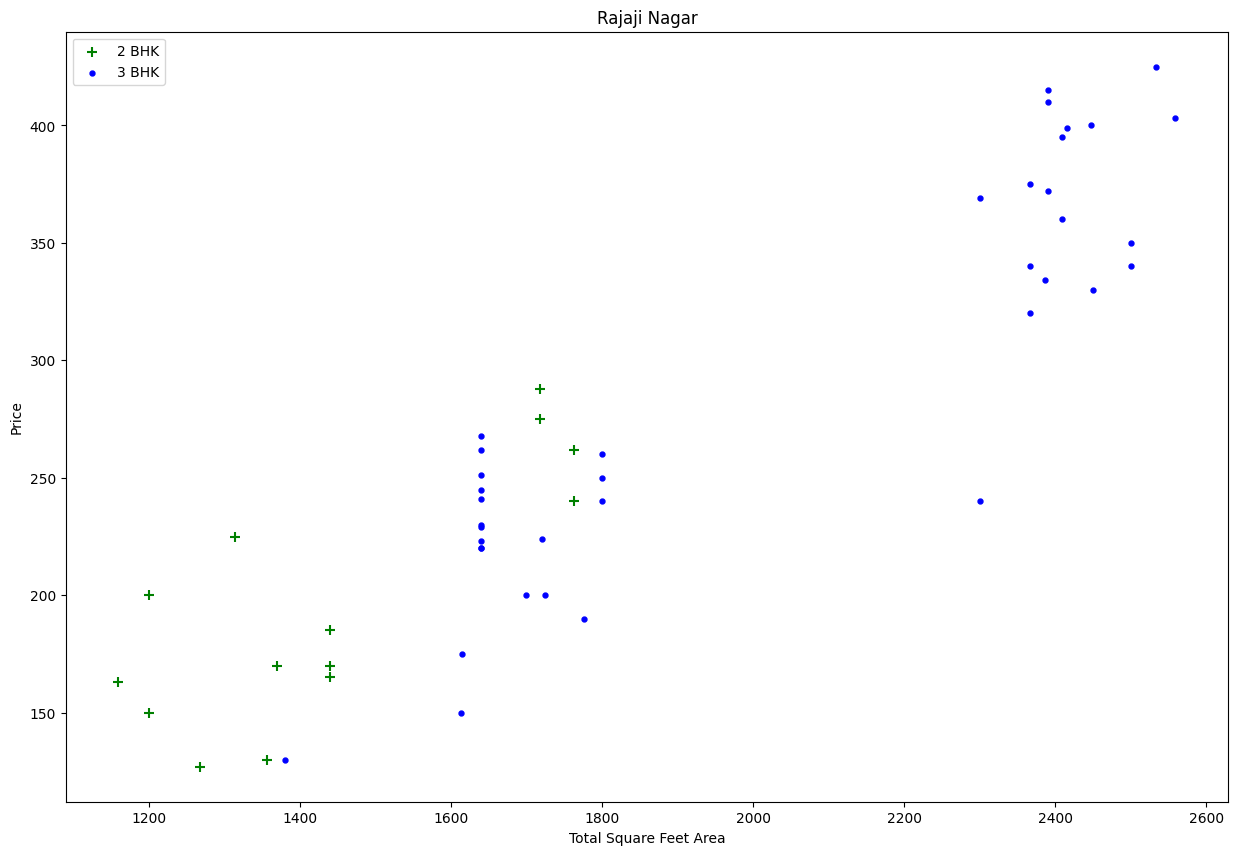

In [37]:
def plot_scatter_chart (df , location) :
    bhk2  = df[(df.location == location) & (df.bhk == 2)]
    bhk3  = df[(df.location == location) &( df.bhk == 3)]
    matplotlib.rcParams ["figure.figsize"]  = (15,10)
    plt.scatter (bhk2.total_sqft,bhk2.price , marker = "+" , s = 50 , color  = "green", label = "2 BHK" )
    plt.scatter (bhk3.total_sqft,bhk3.price , marker = "." , s = 50 , color  = "blue", label = "3 BHK" )
    plt.xlabel ("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
plot_scatter_chart(df7,'Rajaji Nagar')

# def plot_scatter_chart(df, location):
#     bhk2 = df[(df.location==location) & (df.bhk==2)]
#     bhk3 = df[(df.location==location) & (df.bhk==3)]
    
#     matplotlib.rcParams['figure.figsize'] = (15,10)
    
#     plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
#     plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', label='3 BHK', s=50)
    
#     plt.xlabel("Total Square Feet Area")
#     plt.ylabel("Price")
#     plt.title(location)
#     plt.legend()

# plot_scatter_chart(df7, "Rajaji Nagar")


In [38]:
def remove_bhk_outliers(df):
    # Initialize an empty list to store the indices of properties to exclude
    exclude_indices = np.array([])
    
    # Group data by 'location'
    for location, location_df in df.groupby('location'):
        
        # Create a dictionary to store statistics (mean, std, count) for each BHK in the location
        bhk_stats = {}
        
        # Group data by 'bhk' (bedroom count) and calculate mean, std, and count for price_per_sqft
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),  # Calculate mean of price_per_sqft
                'std': np.std(bhk_df.price_per_sqft),    # Calculate standard deviation of price_per_sqft
                'count': bhk_df.shape[0]                 # Count the number of properties
            }
        
        # For each BHK, check for outliers in comparison to the mean of the 1 BHK apartments
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)  # Get stats for the previous BHK (e.g., for 2 BHK, get 1 BHK stats)
            
            if stats and stats['count'] > 5:  # Only proceed if 1 BHK has enough data
                # Identify properties whose price_per_sqft is less than the mean price_per_sqft of 1 BHK
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < stats['mean']].index.values)
    
    # Drop the rows of the identified outliers from the dataframe
    return df.drop(exclude_indices, axis='index')

df8 = remove_bhk_outliers(df7)
df8.shape

(7329, 7)

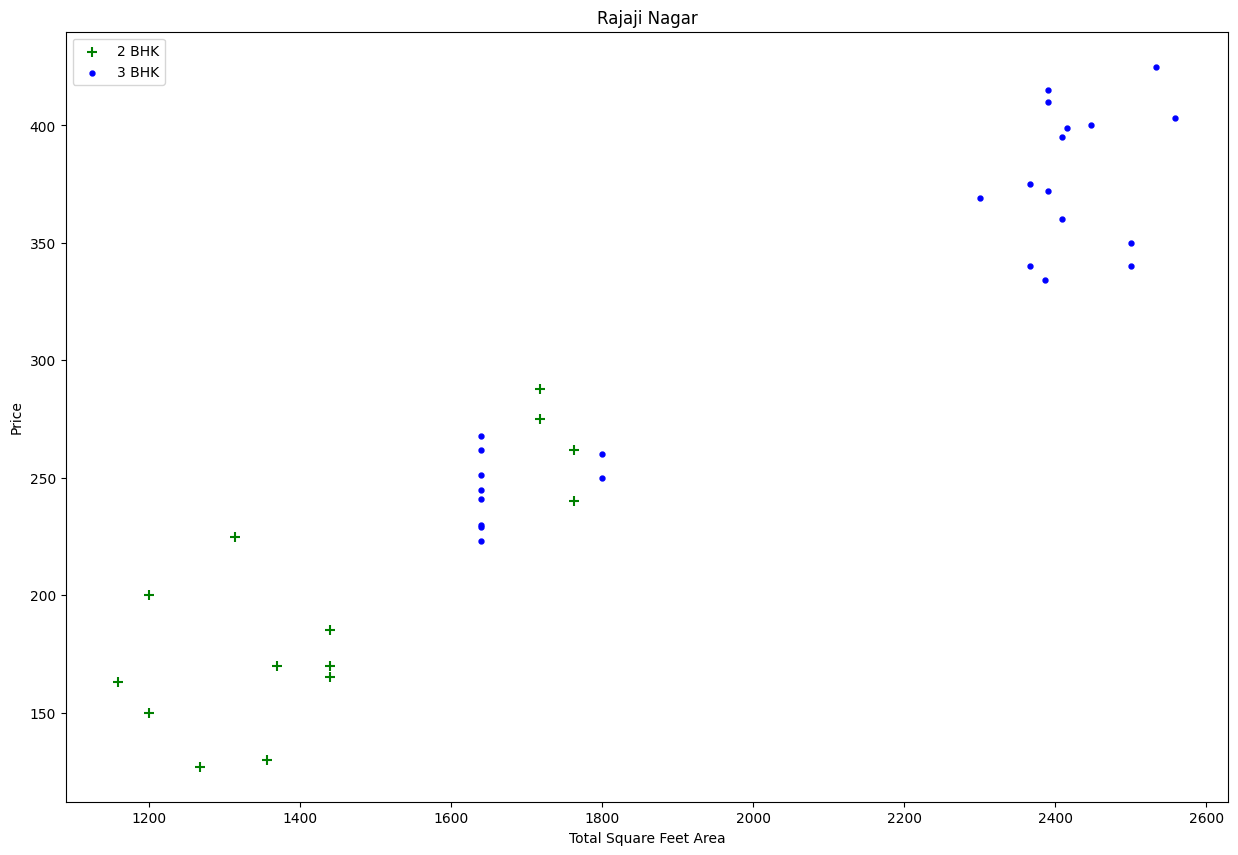

In [39]:
plot_scatter_chart(df8,'Rajaji Nagar')

Text(0, 0.5, 'Count')

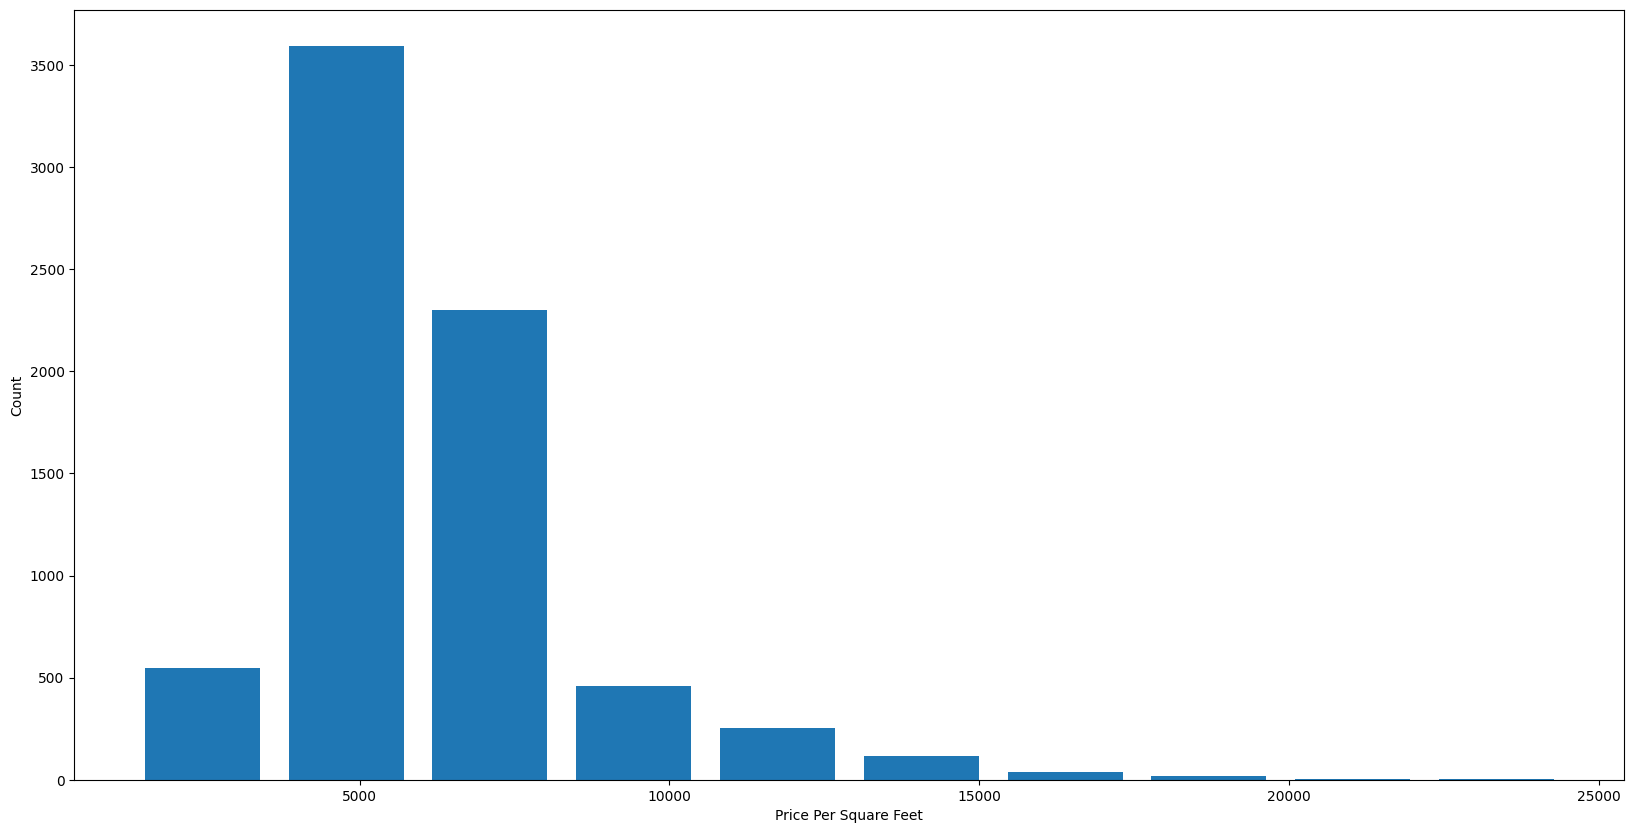

In [40]:
import matplotlib
matplotlib.rcParams["figure.figsize"]= (20,10)
plt.hist(df8.price_per_sqft, rwidth = 0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")


Text(0, 0.5, 'Count')

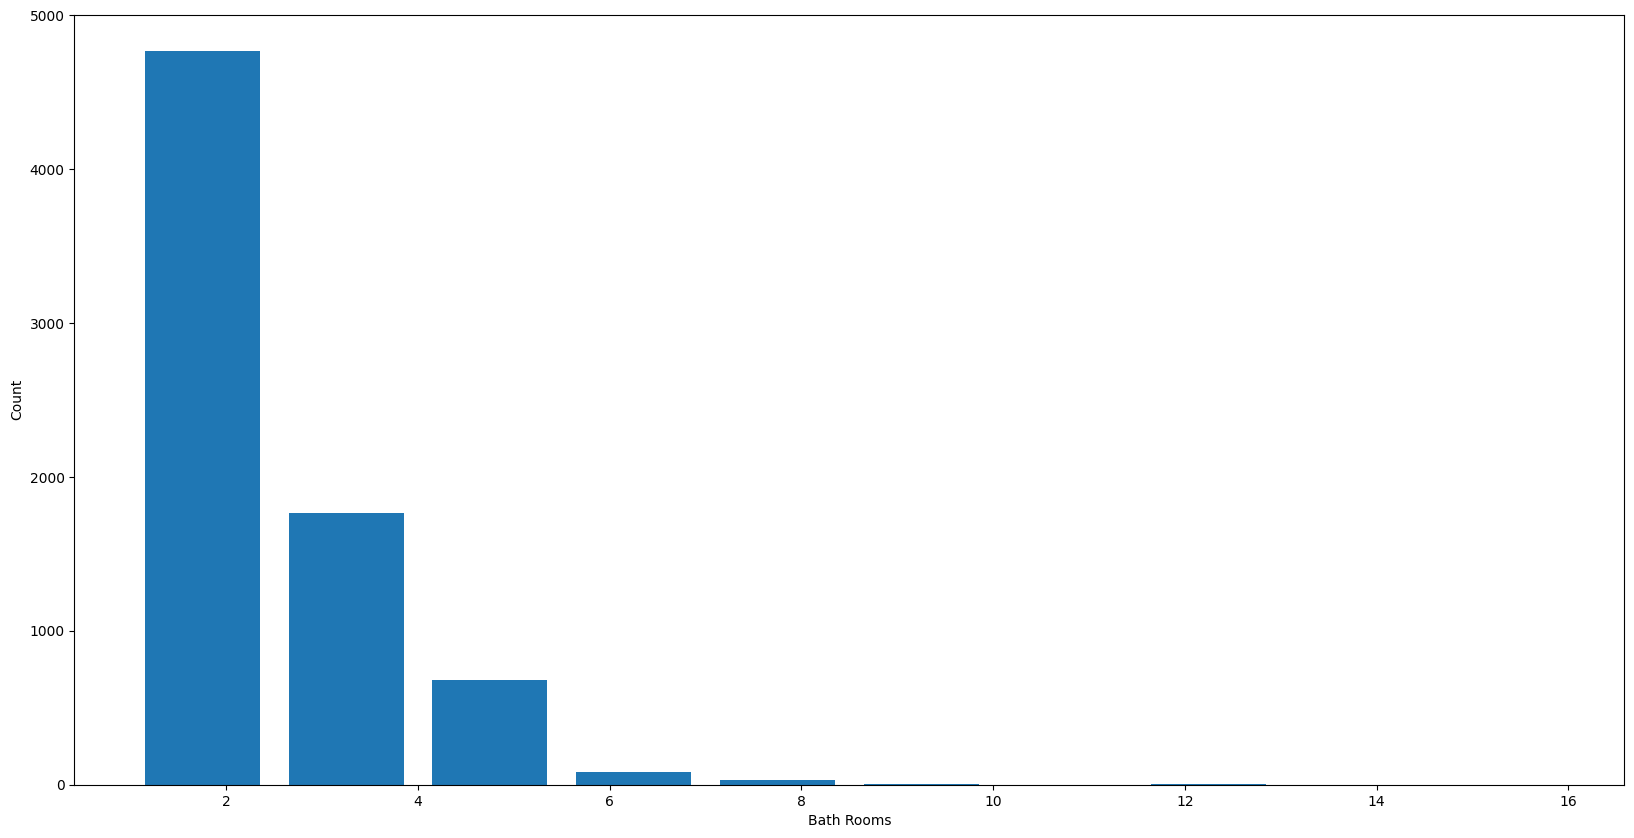

In [41]:
plt.hist(df8.bath, rwidth = 0.8)
plt.xlabel("Bath Rooms")
plt.ylabel ("Count")

In [42]:
df8[df8.bath > df8.bhk +2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.03
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.57
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.03
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.90


In [43]:
df9 = df8[~(df8.bath > df8.bhk +2)]
df9.shape

(7325, 7)

In [44]:
df9.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.54
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.84
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.33
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.33
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.81


In [45]:
df10  = df9.drop(["size", "price_per_sqft"], axis =1)

In [46]:
df10.head(2)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3


In [47]:
dummies = pd.get_dummies(df10.location)
dummies.shape

(7325, 242)

In [48]:
df11 = pd.concat([df10, dummies.drop("other", axis = 1)], axis = 1)
df11.shape

(7325, 246)

In [49]:
df12 = df11.drop("location" , axis = 1)
df12.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [50]:
df12.shape

(7325, 245)

In [51]:
X = df12.drop("price", axis = 1)
X.head(3)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [52]:
y= df12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=10)

In [54]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.8614046401750771

In [55]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5, train_size=0.8, test_size=.2,random_state=0)
cross_val_score(LinearRegression() , X, y, cv = cv)

array([0.85435491, 0.83563607, 0.82369758, 0.84409753, 0.81649097])

In [56]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
import pandas as pd

def get_best_model_using_grid_search_cv(X, y): 
    algos = {
        "linear_regression": {
            "model": LinearRegression(), 
            "params": {
                "fit_intercept": [True, False] 
            }
        }, 
        "lasso": {
            "model": Lasso(), 
            "params": {
                "alpha": [1, 2], 
                "selection": ["random", "cyclic"]
            }
        }, 
        "decision_tree": {
            "model": DecisionTreeRegressor(), 
            "params": {
                "criterion": ["mse", "friedman_mse"], 
                "splitter": ["best", "random"]
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, train_size=0.8, test_size=0.2, random_state=0)
    
    for algo_name, config in algos.items():
        gs = GridSearchCV(config["model"], config["params"], cv=cv, return_train_score=False)
        gs.fit(X, y)
        
        scores.append({
            "model": algo_name, 
            "best_score": gs.best_score_, 
            "best_params": gs.best_params_
        })
    
    return pd.DataFrame(scores, columns=["model", "best_score", "best_params"])

get_best_model_using_grid_search_cv(X, y)


C:\Users\PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Users\PC\Ap

,model,best_score,best_params
0,linear_regression,0.835319,{'fit_intercept': False}
1,lasso,0.684359,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.743905,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [60]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [62]:
loc_index = np.where(X.columns== "1st Phase JP Nagar") [0][0]  
loc_index

np.int64(4)

In [63]:
x = np.zeros(len(X.columns))
x

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [69]:
def predict_price (location , sqft, bath, bhk ) : 
    loc_index = np.where(X.columns == location) [0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath 
    x[2] = bhk 
    if loc_index >= 0 : 
        x[loc_index] = 1
    return lr_clf.predict([x])[0]
    

In [70]:
predict_price("1st Phase JP Nagar", 1000, 2,2)

C:\Users\PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(85.90883783687009)

In [71]:
predict_price("1st Phase JP Nagar", 1000, 3,3)

C:\Users\PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(88.13333154122091)

In [72]:
predict_price("Indira Nagar", 1000, 2,2)

C:\Users\PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(188.06978195217445)

In [73]:
predict_price("Indira Nagar", 1000, 3,3)

C:\Users\PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(190.2942756565253)

In [78]:
import pickle 
with open("real_state_price_prediction.pickle", "wb") as file :
    pickle.dump(lr_clf ,file)

In [80]:
import json
columns= {
   "data_columns" : [col.lower() for col in X.columns] 
}
with open("columns.json", "w") as f : 
    json.dump(columns, f)